#import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Dataset

In [32]:
df= pd.read_csv('cardio_train.csv', sep=';')

In [33]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [35]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [36]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [37]:
sum(df.duplicated())

0

# Data Cleaning

In [38]:
df.drop(columns=['id'], inplace=True)

In [39]:
categorical_columns=['cholesterol', 'gluc', 'smoke', 'alco', 'active','cardio','gender']

In [40]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [41]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

# Visualize outliers

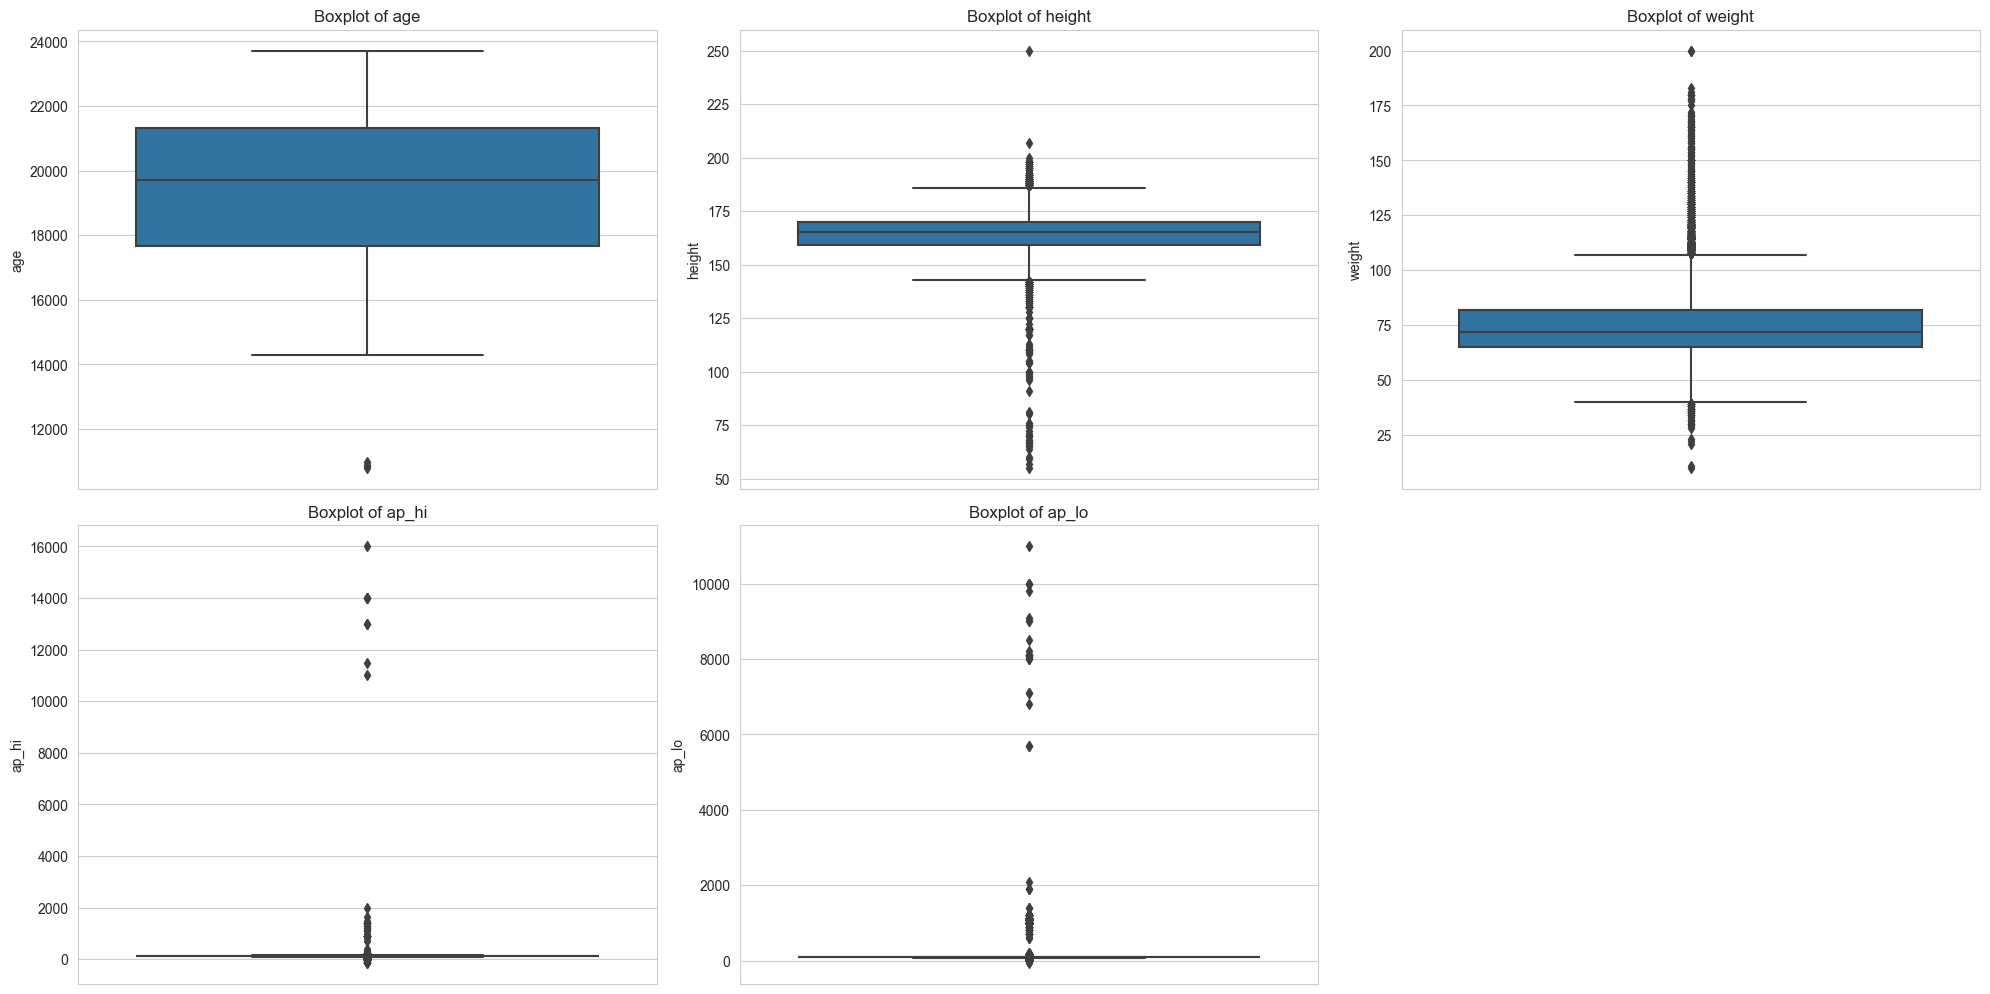

In [42]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Remove Outliers

In [43]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [44]:
for col in numerical_columns:
    df = remove_outliers(df, col)

In [45]:
df.shape

(62502, 12)

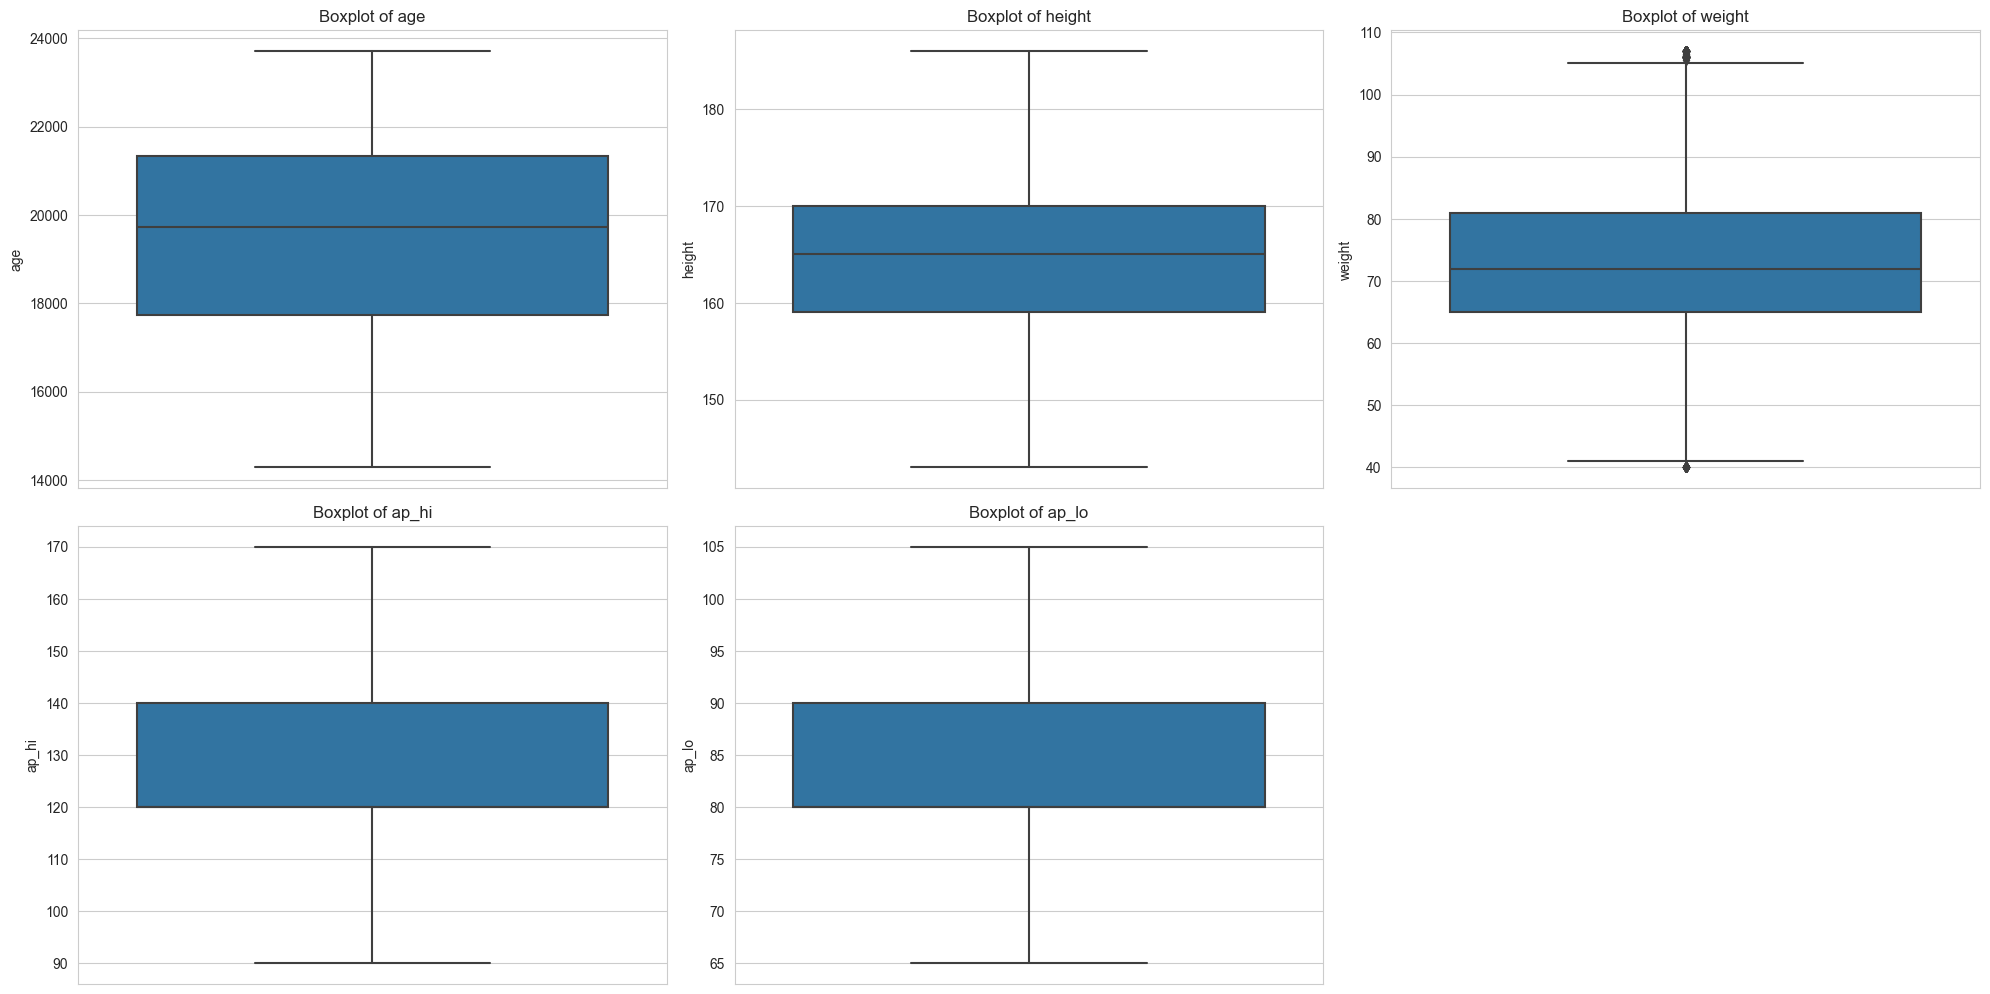

In [46]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Feature Engineering

## adding BMI from weight and height

In [47]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [48]:
df['BMI'] = df['BMI'].astype('float64')

## converting age to years from days

In [49]:
df['age'] = df['age'] // 365

## Adding MAP (Mean Arterial Pressure)


In [50]:
df['MAP']= (df['ap_hi'] + 2*df['ap_lo'])/3

## dropping redundant columns

In [51]:
df.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight'], inplace=True)

# Overview after Feature Engineering

In [52]:
df.dtypes

age               int64
gender         category
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
BMI             float64
MAP             float64
dtype: object

In [53]:
df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,2,1,1,0,0,1,0,21.967120,90.000000
1,55,1,3,1,0,0,1,1,34.927679,106.666667
2,51,1,3,1,0,0,0,1,23.507805,90.000000
3,48,2,1,1,0,0,1,1,28.710479,116.666667
5,60,1,2,2,0,0,0,0,29.384676,93.333333


# saving dataset before Binning Continous Features

In [54]:
df.to_csv('cardio_data(IQR-pre_binning).csv')

# Bin Continuous Features

In [55]:
BMIbins = np.linspace(df['BMI'].min(),df['BMI'].max(), 6 )
MAPbins= np.linspace(df['MAP'].min(),df['MAP'].max(), 6)
AgeBins= np.linspace(df['age'].min(),df['age'].max(), 6 )
AgeBins = AgeBins.astype(int)

In [56]:
AgeBins

array([39, 44, 49, 54, 59, 64])

In [57]:
AgeBins

array([39, 44, 49, 54, 59, 64])

In [58]:
df['age']=pd.cut(df['age'], bins=AgeBins, labels=[1, 2, 3, 4, 5], include_lowest=True)
df['BMI']=pd.cut(df['BMI'], bins=BMIbins, labels=[1, 2, 3, 4, 5], include_lowest=True)
df['MAP']=pd.cut(df['MAP'], bins=MAPbins, labels=[1, 2, 3, 4, 5], include_lowest= True)

In [59]:
df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,3,2,1,1,0,0,1,0,2,2
1,4,1,3,1,0,0,1,1,3,4
2,3,1,3,1,0,0,0,1,2,2
3,2,2,1,1,0,0,1,1,3,5
5,5,1,2,2,0,0,0,0,3,2


# Exporting cleaned data

In [60]:
df.to_csv('cardio_data_cleaned(IQR).csv', index=False)

In [61]:
pd.read_csv('cardio_data_cleaned(IQR).csv')

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,3,2,1,1,0,0,1,0,2,2
1,4,1,3,1,0,0,1,1,3,4
2,3,1,3,1,0,0,0,1,2,2
3,2,2,1,1,0,0,1,1,3,5
4,5,1,2,2,0,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...
62497,3,1,1,1,0,0,1,1,2,3
62498,4,1,1,1,0,0,1,1,3,3
62499,3,2,1,1,1,0,1,0,2,2
62500,5,1,1,2,0,0,0,1,2,3


In [62]:
df.isnull().sum()

age            0
gender         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
MAP            0
dtype: int64